# Working with datasets

In [11]:
import metview as mv

## Setting the target plotting device
We want the plots to appear in the notebook. This needs to be specified only once.

In [12]:
mv.setoutput("jupyter", output_width=600)

## Getting the data

### What is a dataset?

A dataset is simply a set of data files (GRIB and CSV) packed together with customised styles for the ease of visualisation. The GRIB data in a dataset is typically indexed providing fast access to the individual fields. Datasets are best suited for case studies and training courses where participants mainly want to focus on the scientific contents and not on the details of data access and plot customisation.  

### Loading the dataset

We will use a dataset called "demo" in this notebook. By default the **MPY_DATASET_ROOT** environmental variable defines the root directory for the Metview datasets. If it is undefined **$HOME/mpy_dataset** is regarded as the root. Since "demo" is a built-in dataset (hosted on a dedicated data server) it will automatically be downloaded for you on first use (this might take a minute or so).

Now, let us load the dataset:

In [13]:
ds = mv.load_dataset("demo")

### Dataset components

Our data is split into components (or experiments); we can get a quick overview of them by using the describe() method:

In [14]:
ds.describe()

Dataset components:


,Description
Component,
an,ECMWF operational analysis
oper,ECMWF operational forecast
control,
track,Storm track data


This data is related to the **Hurricane Karl** case in 2016 and contains analysis and forecast fields (GRIB) on a limited area alongside with some storm tracks (CSV). 

We can call [describe()](../api/functions/describe.rst) to see what a component actually comprises of:

In [15]:
ds["oper"].describe()

parameter,typeOfLevel,level,date,time,step,paramId,class,stream,type,experimentVersionNumber
10u,surface,0,20160925,0,"0,24,...",165,od,oper,fc,0001
10v,surface,0,20160925,0,"0,24,...",166,od,oper,fc,0001
2t,surface,0,20160925,0,"0,24,...",167,od,oper,fc,0001
eqpt,isobaricInhPa,"100,150,...",20160925,0,"0,24,...",4,od,oper,fc,0001
msl,surface,0,20160925,0,"0,24,...",151,od,oper,fc,0001
pt,isobaricInhPa,"100,150,...",20160925,0,"0,24,...",3,od,oper,fc,0001
pv,isobaricInhPatheta,"100,150,...320",20160925,0,"0,24,...",60,od,oper,fc,0001
q,isobaricInhPa,"100,150,...",20160925,0,"0,24,...",133,od,oper,fc,0001
r,isobaricInhPa,"100,150,...",20160925,0,"0,24,...",157,od,oper,fc,0001
sst,surface,0,20160925,0,"0,24,...",34,od,oper,fc,0001


and to inspect individual parameters:

In [16]:
ds["oper"].describe("msl")

shortName,msl
paramId,151
typeOfLevel,surface
level,0
date,20160925
time,0
step,"0,24,48,72,96,120,144"
class,od
stream,oper
type,fc
experimentVersionNumber,0001


### Selecting data

We use [select()](../api/functions/select.rst) to extract the same set of steps from the operational forecast and control experiment forecast and the matching dates/times from the analysis. 

In [17]:
run = mv.date("2016-09-25 00:00")
step = [0, 24, 48, 72, 96]

op = ds["oper"].select(date=run.date(), time=run.time(), step=step)
ct = ds["control"].select(date=run.date(), time=run.time(), step=step)
an = ds["an"].select(dateTime=mv.valid_date(base=run, step=step))

Variables *op*, *ct* and *op* are [Fieldset](../data_types/fieldset.rst) objects.

In [18]:
an

## Map customistation

We will use the [plot_maps()](../api/functions/plot_maps.rst) convenience function to generate map-based plots. In this chapter we will simply use it without any data and focus on the area selection and styling.

### The default map plot

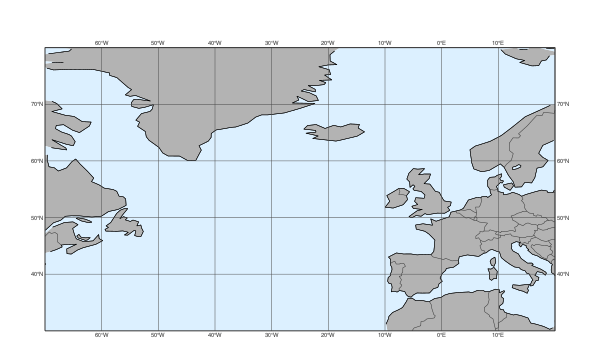

In [19]:
mv.plot_maps()

When we called [load_dataset()](../api/functions/load_dataset.rst) not only the data itself became available but the **dataset style configuration** was also loaded making its predefined settings available for functions like [plot_maps()](../api/functions/plot_maps.rst). 

Our dataset defines a map area called "base" and also a map style called "base"; these two together set the default for [plot_maps()](../api/functions/plot_maps.rst). This is why we automatically got a plot on the North-Atlantic area with a grey-blue land sea shading.

### Customising the map

Metview has a set of predefined map areas (see [map_area_gallery()](../api/functions/map_area_gallery.rst) for details) and our dataset also contains the areas "atl" and "nweur" on top of "base". All these can be used with the **area** argument of [plot_maps()](../api/functions/plot_maps.rst):

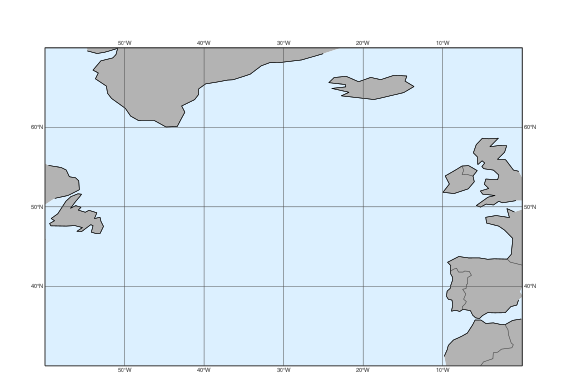

In [20]:
mv.plot_maps(area="atl")

Alternatively the **area** can also be defined as a list of [**S**,**W**,**N**,**W**]:

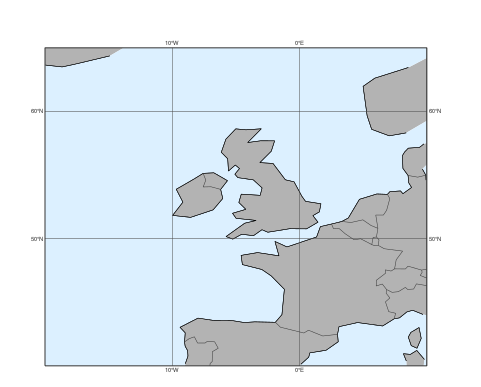

In [21]:
mv.plot_maps(area=[40,-20, 65, 10])

For further customisation, including the map style, we need to use the **view** argument with a [geoview()](../gen_files/icon_functions/geoview.rst) object. The simplest way to do so is to use [make_geoview()](../api/functions/make_geoview.rst):

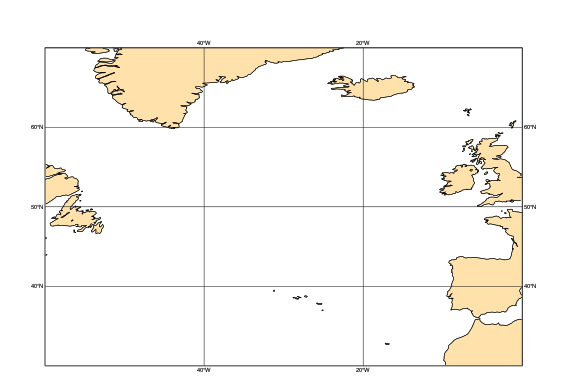

In [22]:
view = mv.make_geoview(area="atl", style="cream_land_only")
mv.plot_maps(view=view)

Here **style** can be any built-in Metview map style or one from the current dataset. See [map_style_gallery()](../api/functions/map_style_gallery.rst) for the available map styles.

## Plotting GRIB data onto maps

When plotting GRIB data we would like to automatically use the right contouring/wind plotting style. The dataset we use contains a detailed **data style configuration**. In many cases this agrees with the predefined EcCharts style but for several parameters a custom style, better suited to given use case, is used. When we called [load_dataset()](../api/functions/load_dataset.rst), just like with the maps, the **data style configuration** was also loaded setting the default for [plot_maps()](../api/functions/plot_maps.rst). In the plots below we will use the style defined by the dataset.

### Plotting surface fields

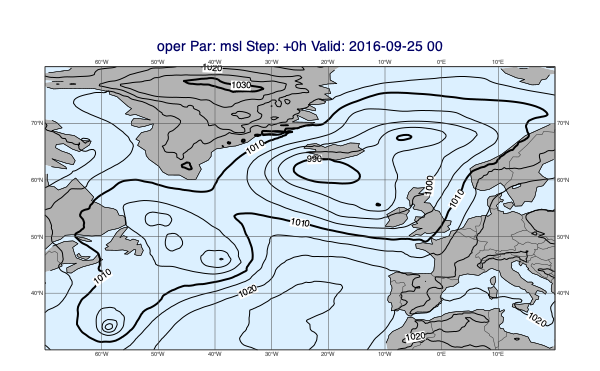

In [23]:
v = op["msl"]
mv.plot_maps(v, title_font_size=0.6)

### Plotting upper level fields

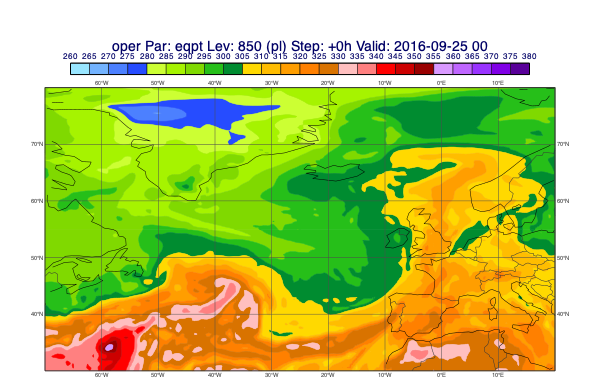

In [24]:
v = op["eqpt850"]
mv.plot_maps(v, title_font_size=0.6)

### Plotting wind fields

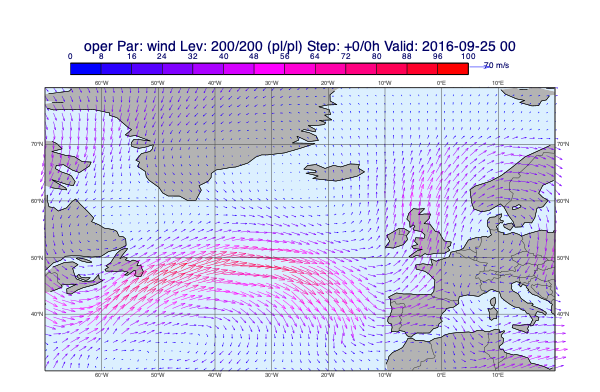

In [25]:
v = op["wind200"]
mv.plot_maps(v, title_font_size=0.6)

### Plotting de-accumulated precipitation

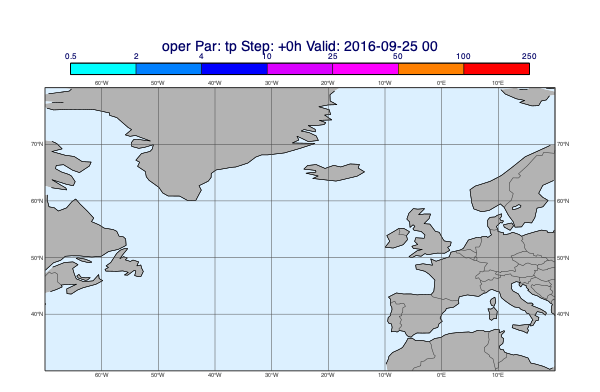

In [26]:
v = op["tp"].deacc()
mv.plot_maps(v, title_font_size=0.6)

### Plotting wind speed

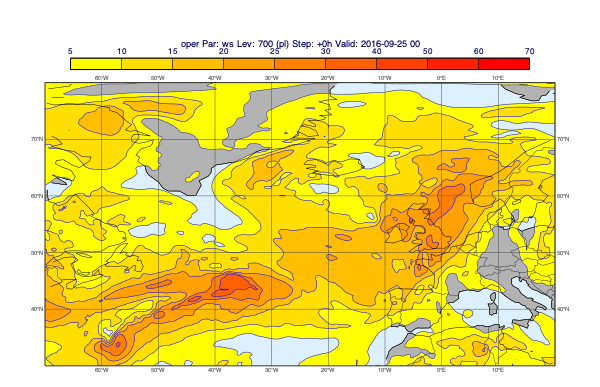

In [27]:
v = op["wind700"].speed()
mv.plot_maps(v)

### Overlaying fields

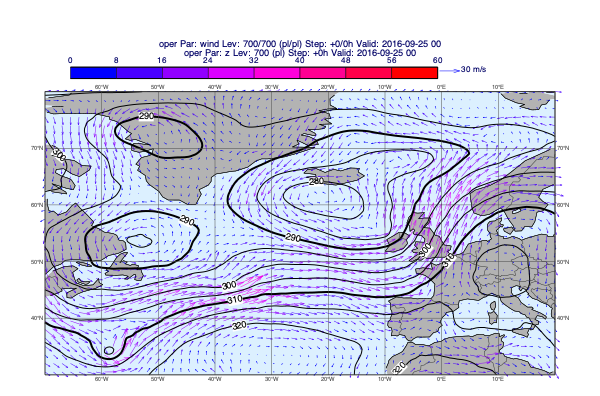

In [28]:
v1 = op["wind700"]
v2 = op["z700"]
mv.plot_maps(v1, v2)

### Using a layout

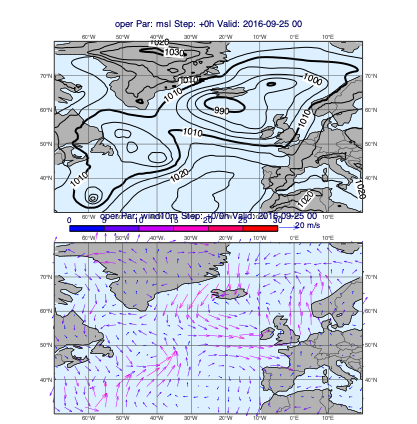

In [29]:
v1 = op["msl"]
v2 = op["wind10m"]
mv.plot_maps([v1], [v2])

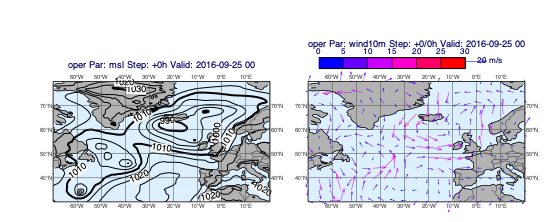

In [30]:
v1 = op["msl"]
v2 = op["wind10m"]
mv.plot_maps([v1], [v2], layout="1x2")

## Plotting storm tracks

Our dataset contains some storm tracks in CSV format.

In [31]:
ds["track"].describe()

Tracks:


,Suffix
Name,
final_track_op_an_KARL,.csv
karl_track,.csv
track_0910-0920,.csv
track_an_1_2016_KARL,.csv
track_ea_1_2016,.csv
track_hres_fc_KARL,.csv


When we call *select()* on a track database component it returns a [Track](../data_types/track.rst) object that we can directly visualise with [plot_maps()](../api/functions/plot_maps.rst). 

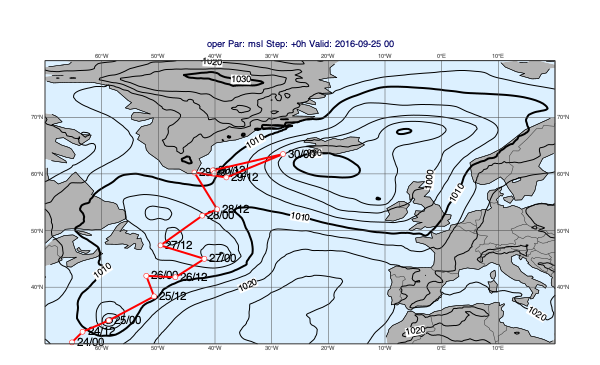

In [32]:
msl = op["msl"]
tr = ds["track"].select("final_track_op_an_KARL")
mv.plot_maps(msl, tr)

## Difference plots

To generate difference plots we will use the [plot_diff_maps()](../api/functions/plot_diff_maps.rst) function, which works in many aspects in a similar way to [plot_maps()](../api/functions/plot_maps.rst). The key difference is that it uses the "base_diff" **default map_style** from the dataset (instead of "base") and the plot layout is fixed. 

### Basic usage

The first example is a classic forecast minus analysis plot:

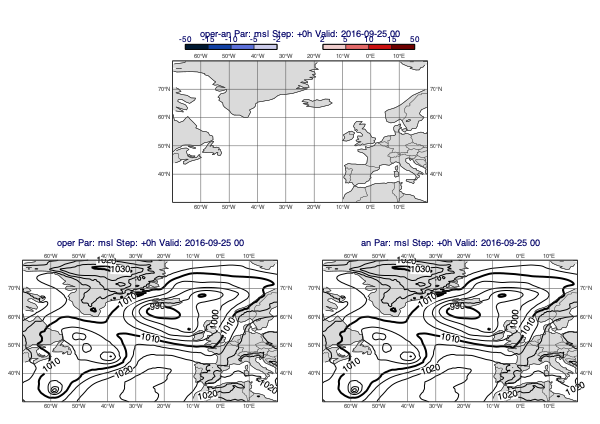

In [33]:
v1 = op["msl"]
v2 = an["msl"]
mv.plot_diff_maps(v1, v2)

### Accumulated fields

Precipitation forecasts and other accumulated fields need to be de-accumulated. The following example plots the difference between the control and operational precipitation forecasts (for 24h periods):

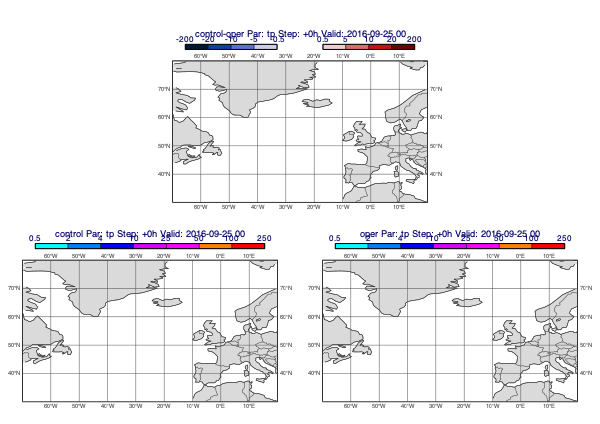

In [34]:
v1 = ct["tp"].deacc()
v2 = op["tp"].deacc()
mv.plot_diff_maps(v1, v2)

### Customising the difference style

All the predefined difference contour styles use two [mcont()](../gen_files/icon_functions/mcont.rst) objects; the first defining the negative value range while the other the positive one. The value ranges are symmetrical i.e. mirrored to 0. To define a new value range for the default style use the **pos_values** argument; it sets the positive value range and the negative one is automatically generated from it.

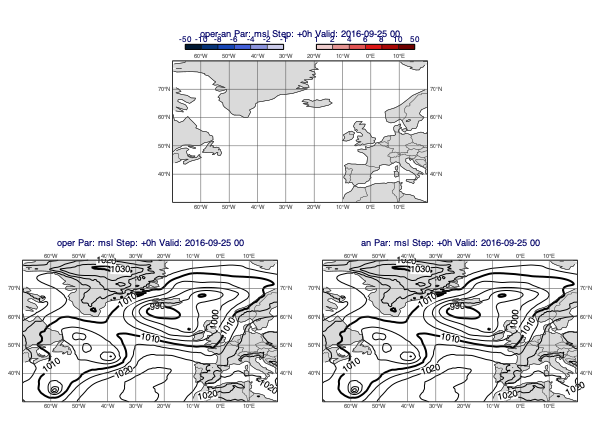

In [35]:
v1 = op["msl"]
v2 = an["msl"]
mv.plot_diff_maps(v1, v2, pos_values=[1,2,4,6,8,10,50])

### Overlay with track

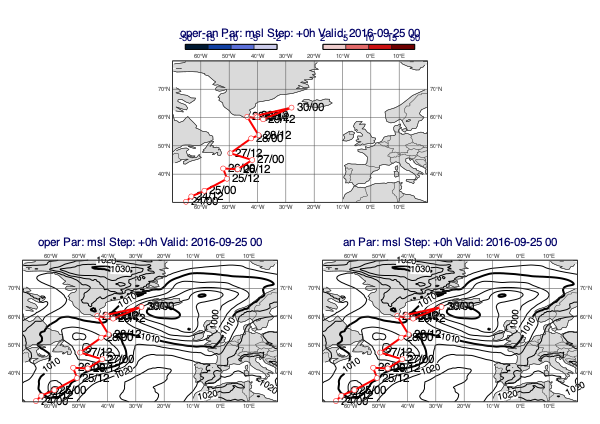

In [36]:
v1 = op["msl"]
v2 = an["msl"]
tr = ds["track"].select("final_track_op_an_KARL")
mv.plot_diff_maps(v1, v2, overlay=tr, title_font_size=0.5, legend_font_size=0.4)

## Cross sections

To generate cross sections we will use the [plot_xs()](../api/functions/plot_xs.rst) function. Similarly to the previous *plot_&ast;()* functions we have seen so far it also gets its default data plotting style from the database we loaded.

Cross section plotting only works for a given date/time so we select one step from the operational forecast:

In [37]:
run = mv.date("2016-09-25 00:00")
step = [24]
d = ds["oper"].select(date=run.date(), time=run.time(), step=step)

The plotting goes like this:

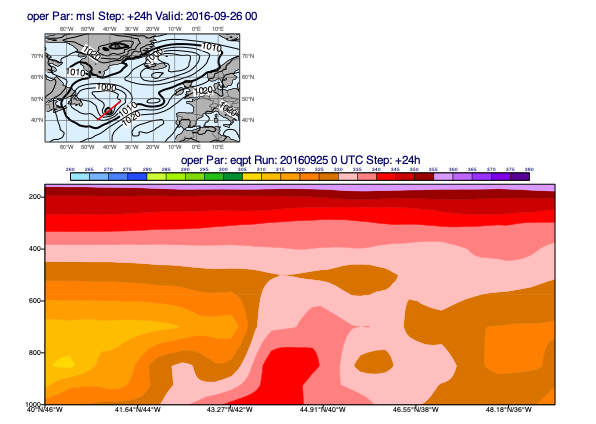

In [38]:
line = [40, -46, 49, -35]
pt = d["eqpt"]
msl = d["msl"]
mv.plot_xs(pt, map_data=msl, line=line, title_font_size=0.5)

Since our data contains the 3D wind (u, v and pressure velocity (w)) it can also be plotted into the cross section:

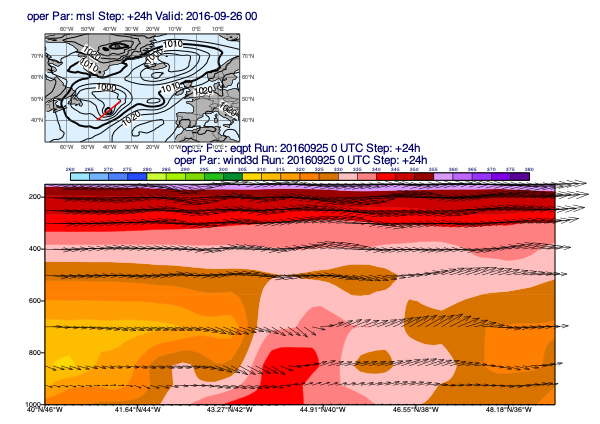

In [39]:
w = d["wind3d"]
mv.plot_xs(pt, w, map_data=msl, line=line, title_font_size=0.5)